解决该问题适用分类算法

参考：[Model Whale](https://www.heywhale.com/mw/project/5c483e3489f4aa002b85a3d5)

In [43]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data=pandas.read_csv('Case.csv')

0    2247
1     193
Name: YN_SC, dtype: int64

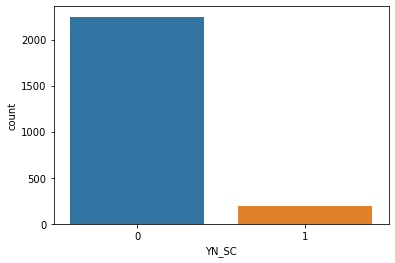

In [65]:
# 看一下两个类分别有多少个数据
sns.countplot(x="YN_SC", data=data)
data.loc[:,'YN_SC'].value_counts()

In [67]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'YN_SC'], data.loc[:,'YN_SC']
knn.fit(x,y)
prediction = knn.predict(x)
# format()：格式化输出
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


In [72]:
from sklearn.model_selection import train_test_split
# 切分数据集、测试集，固定随机种子（保证数据集每次的切分都一样）
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
# 设置k值为3
knn = KNeighborsClassifier(n_neighbors = 12)
# 设置特征值和预测值
x,y = data.loc[:,data.columns != 'YN_SC'], data.loc[:,'YN_SC']
# 将模型拟合到训练集
knn.fit(x_train,y_train)
# 预测精准度
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=12) accuracy is: ',knn.score(x_test,y_test)) 

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

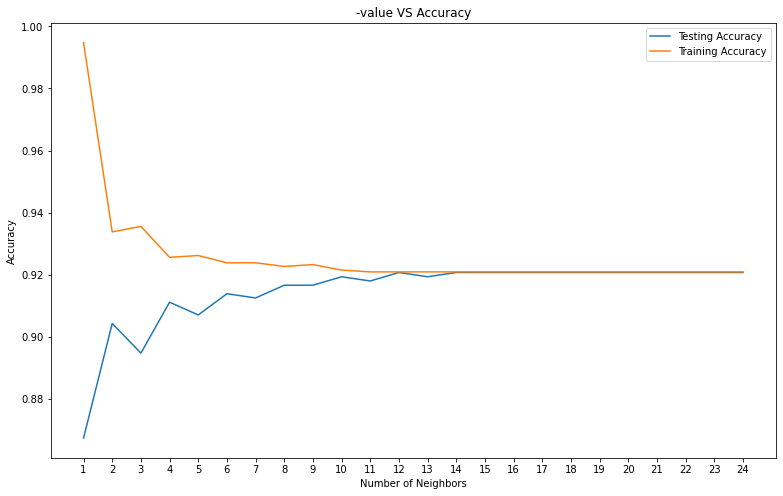

Best accuracy is 0.9207650273224044 with K = 12


In [69]:
# 模型复杂度
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# 循环K值从1到25
for i, k in enumerate(neig):
    # k从1到25(不包括1、25)
    knn = KNeighborsClassifier(n_neighbors=k)
    # 使用KNN拟合
    knn.fit(x_train,y_train)
    # 训练集的准确度
    train_accuracy.append(knn.score(x_train, y_train))
    # 测试集的准确度
    test_accuracy.append(knn.score(x_test, y_test))

# 可视化
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [73]:
# 随机森林的混淆矩阵(confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'YN_SC'], data.loc[:,'YN_SC']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[663  11]
 [ 58   0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       674
           1       0.00      0.00      0.00        58

    accuracy                           0.91       732
   macro avg       0.46      0.49      0.48       732
weighted avg       0.85      0.91      0.88       732



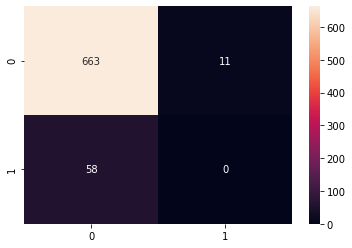

In [74]:
# 使用seaborn库进行可视化
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

ROC曲线与逻辑回归

逻辑回归是一种极其高效的概率计算机制，输出的是概率估值。

如果概率大于0.5，则数据为1(abnormal)，否则为0(normal)

默认情况下逻辑回归的分类阈值为0.5

In [75]:
# ROC曲线与逻辑回归
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 ， normal = 0
data['class_binary'] = [1 if i == '1' else 0 for i in data.loc[:,'YN_SC']]
x,y = data.loc[:,(data.columns != 'YN_SC') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# 绘制ROC曲线
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

超参数调优

正如在KNN中提到的，我们需要对超参数进行优化

举个栗子:

KNN中的k

Ridge和Lasso中的α

随机森林中的max_depth

线性回归中的参数

超参数调优:

尝试不同参数的所有组合

拟合模型

衡量预测的准确度

看看他们的表现如何

最后选择最佳超参数

我们只需要一行代码，即GridSearchCV

grid: K从1到50(开区间)

GridSearchCV采用knn和grid进行网格搜索。它意味着所有超参数的组合。示例中是k。

In [76]:
# 网格搜索与超参数调优
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3)    # GridSearchCV
knn_cv.fit(x,y)   # 训练

# 打印hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 1.0
